In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

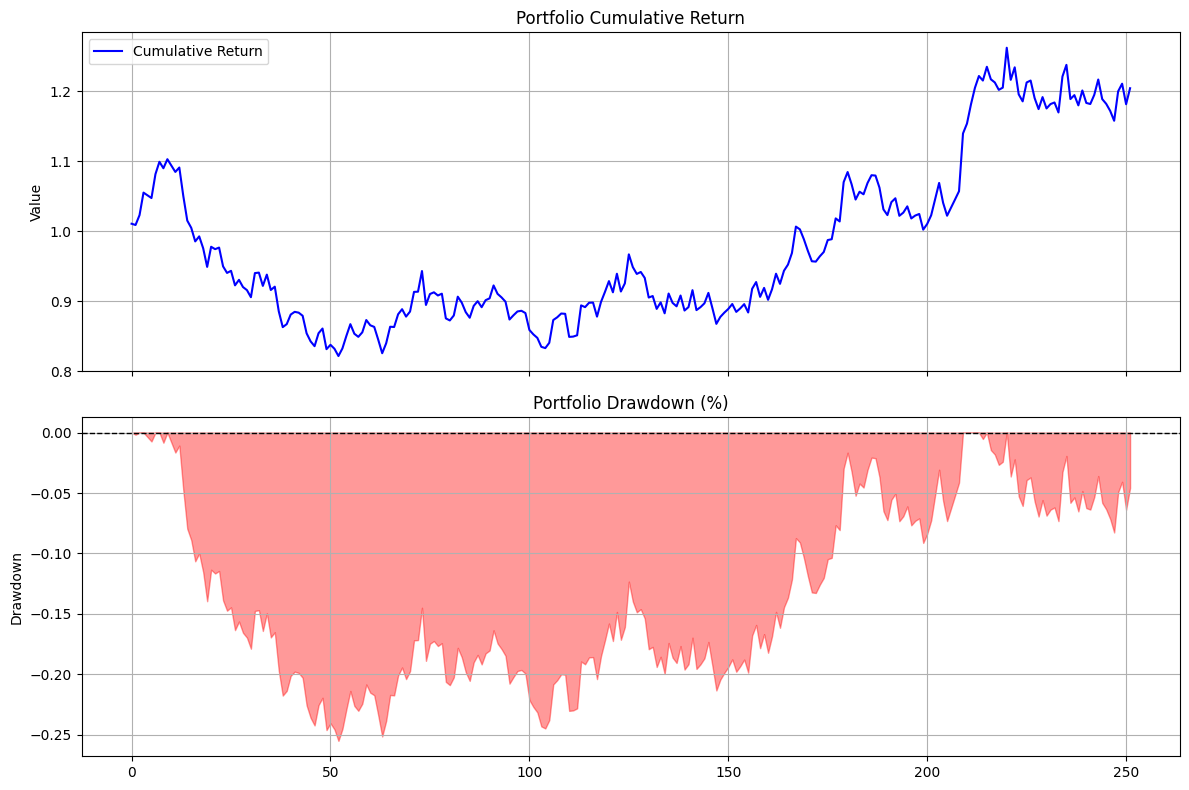

In [19]:
np.random.seed(42)

# asset = np.random.normal(mean, std, size)
returns = np.random.normal(0.001, 0.02, 252)

downside_returns = returns[returns < 0]

downside_deviation = downside_returns.std()

Rf = 0.0002

sortino_ratio = (returns.mean() - Rf) / downside_deviation

cumulative = (1 + returns).cumprod()

cumulative = pd.Series(cumulative) # Convert to pd.Series for cummax()

rolling_max = cumulative.cummax()

drawdown = (cumulative - rolling_max) / rolling_max

max_drawdown = drawdown.min()

# print(f"Deviation: {downside_deviation}; Sortino Ratio: {sortino_ratio}; Cumulative: {cumulative}; Rolling Max {rolling_max}; Drawdown: {drawdown}; Maximum Drawdown: {max_drawdown}")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top subplot: Portfolio cumulative return
ax1.plot(cumulative, label="Cumulative Return", color="blue")
ax1.set_title("Portfolio Cumulative Return")
ax1.set_ylabel("Value")
ax1.grid(True)
ax1.legend()

# Bottom subplot: Drawdown
ax2.fill_between(drawdown.index, drawdown, 0, color="red", alpha=0.4)
ax2.axhline(0, color="black", linewidth=1, linestyle="--")  # recovery line
ax2.set_title("Portfolio Drawdown (%)")
ax2.set_ylabel("Drawdown")
ax2.grid(True)

# Step 3: Layout
plt.tight_layout()
plt.show()